In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
pd.low_memory=False

In [2]:
msstats = pd.read_csv("ComparisonResult_CoV21_TMP_AllPeptides_Column_With_Batch_Names.csv")
result = pd.read_csv("scoring_result_CoV21.txt", sep="\t")

msstats["Bait_Prey_Pos"] = msstats["groupPos"].str.cat(msstats["Protein"], sep="-")
msstats["Bait_Prey_Neg"] = msstats["groupNeg"].str.cat(msstats["Protein"], sep="-")
msstats["Normalization"] = "TMP_AllPeptides_Column_With_Batch_Names"
batch = msstats["groupPos"].iloc[0].split("_")[-1]
msstats.head(3)

Protein       groupNeg              groupPos  \
0  A0A0U1RRE5  nsp2_WT_CoV21  nsp2_D23Y_R27C_CoV21   
1      A1KXE4  nsp2_WT_CoV21  nsp2_D23Y_R27C_CoV21   
2      A6NDG6  nsp2_WT_CoV21  nsp2_D23Y_R27C_CoV21   

                                Label    log2FC        SE    Tvalue   DF  \
0  nsp2_D23Y_R27C_CoV21-nsp2_WT_CoV21  0.079964  0.315076  0.253793  4.0   
1  nsp2_D23Y_R27C_CoV21-nsp2_WT_CoV21  0.123870  0.322205  0.384445  4.0   
2  nsp2_D23Y_R27C_CoV21-nsp2_WT_CoV21  0.268088  0.242830  1.104016  4.0   

     pvalue  adj.pvalue issue  MissingPercentage  ImputationPercentage  \
0  0.812167    0.965192   NaN           0.333333                     0   
1  0.720213    0.950806   NaN           0.500000                     0   
2  0.331531    0.938359   NaN           0.814815                     0   

   bioRepPos  totalRepPos  bioRepNeg  totalRepNeg  \
0        3.0          3.0        3.0          3.0   
1        3.0          3.0        3.0          3.0   
2        3.0          3.0        3.0          3.0   

                     Bait_Prey_Pos             Bait_Prey_Neg  \
0  nsp2_D23Y_R27C_CoV21-A0A0U1RRE5  nsp2_WT_CoV21-A0A0U1RRE5   
1      nsp2_D23Y_R27C_CoV21-A1KXE4      nsp2_WT_CoV21-A1KXE4   
2      nsp2_D23Y_R27C_CoV21-A6NDG6      nsp2_WT_CoV21-A6NDG6   

                             Normalization  
0  TMP_AllPeptides_Column_With_Batch_Names  
1  TMP_AllPeptides_Column_With_Batch_Names  
2  TMP_AllPeptides_Column_With_Batch_Names

In [3]:
try:
    os.mkdir(batch)
except:
    %pwd

In [4]:
msstats[msstats["groupPos"].str.contains("WT")]

Empty DataFrame
Columns: [Protein, groupNeg, groupPos, Label, log2FC, SE, Tvalue, DF, pvalue, adj.pvalue, issue, MissingPercentage, ImputationPercentage, bioRepPos, totalRepPos, bioRepNeg, totalRepNeg, Bait_Prey_Pos, Bait_Prey_Neg, Normalization]
Index: []

In [5]:
result["Batch"] = batch
result["Bait.x"] = result["Bait.x"].str.cat(result["Batch"], sep="_")
result["Bait_Prey_Pos"] = result["Bait_Prey"].str.split("-").str[0]
result["Bait_Prey_Neg"] = result["Bait_Prey"].str.split("-").str[1]
result["Bait_Prey_old"] = result["Bait_Prey"]
result["Bait_Prey"] = result["Bait.x"].str.cat(result["Prey.x"], sep="-")
result.head(3)

Bait_Prey          Bait.x      Prey.x     PreyGene   Spec  \
0  E_nature_CoV21-A0A0U1RRE5  E_nature_CoV21  A0A0U1RRE5   NBDY_HUMAN  1|1|3   
1      E_nature_CoV21-A1KXE4  E_nature_CoV21      A1KXE4  F168B_HUMAN  0|1|0   
2      E_nature_CoV21-A6NDG6  E_nature_CoV21      A6NDG6    PGP_HUMAN  1|3|6   

   SpecSum  AvgSpec  NumReplicates                         ctrlCounts  AvgP  \
0      5.0     1.67            3.0  3|3|2|1|1|2|3|0|2|3|2|0|0|3|1|2|1  0.02   
1      1.0     0.33            3.0  0|1|1|1|1|1|1|0|0|0|0|1|0|0|1|2|1  0.00   
2     10.0     3.33            3.0  3|8|5|5|5|3|2|3|6|4|5|4|4|5|6|3|3  0.00   

   ...      Prey.y  Abundance  Reproducibility  Specificity      MIST  \
0  ...  A0A0U1RRE5   0.002959     9.320929e-01     0.041562  0.316087   
1  ...      A1KXE4   0.000170     9.102393e-11     0.014088  0.009658   
2  ...      A6NDG6   0.001113     9.408080e-01     0.034103  0.313652   

                           Ip  Batch  Bait_Prey_Pos Bait_Prey_Neg  \
0  qx017144,qx017145,qx017146  CoV21       E_nature    A0A0U1RRE5   
1                    qx017145  CoV21       E_nature        A1KXE4   
2  qx017144,qx017145,qx017146  CoV21       E_nature        A6NDG6   

         Bait_Prey_old  
0  E_nature-A0A0U1RRE5  
1      E_nature-A1KXE4  
2      E_nature-A6NDG6  

[3 rows x 29 columns]

In [6]:
result.columns

Index(['Bait_Prey', 'Bait.x', 'Prey.x', 'PreyGene', 'Spec', 'SpecSum',
       'AvgSpec', 'NumReplicates', 'ctrlCounts', 'AvgP', 'MaxP', 'TopoAvgP',
       'TopoMaxP', 'SaintScore', 'logOddsScore', 'FoldChange', 'BFDR',
       'boosted_by', 'Bait.y', 'Prey.y', 'Abundance', 'Reproducibility',
       'Specificity', 'MIST', 'Ip', 'Batch', 'Bait_Prey_Pos', 'Bait_Prey_Neg',
       'Bait_Prey_old'],
      dtype='object')

In [7]:
%cd $batch

/Users/bhavyahh/OneDrive/-old/UCSF/Mutation APMS/Final/After_MSstats/CoV21


In [8]:
import matplotlib
def fixedWidthClusterMapAnnot(dataFrame, annot, cellSizePixels=30):
    # Calulate the figure size, this gets us close, but not quite to the right place
    dpi = matplotlib.rcParams['figure.dpi']
    marginWidth = matplotlib.rcParams['figure.subplot.right']-matplotlib.rcParams['figure.subplot.left']
    marginHeight = matplotlib.rcParams['figure.subplot.top']-matplotlib.rcParams['figure.subplot.bottom']
    Ny,Nx = dataFrame.shape
    figWidth = (Nx*cellSizePixels/dpi)/0.8/marginWidth
    figHeigh = (Ny*cellSizePixels/dpi)/0.8/marginHeight

    # do the actual plot
    grid = sns.clustermap(dataFrame, figsize=(figWidth, figHeigh), vmin=-5, vmax=5, linewidth = 0.1,
                         cmap = "coolwarm", annot=annot , col_cluster=False  )

    # calculate the size of the heatmap axes
    axWidth = (Nx*cellSizePixels)/(figWidth*dpi)
    axHeight = (Ny*cellSizePixels)/(figHeigh*dpi)

    # resize heatmap
    ax_heatmap_orig_pos = grid.ax_heatmap.get_position()
    grid.ax_heatmap.set_position([ax_heatmap_orig_pos.x0, ax_heatmap_orig_pos.y0, 
                                  axWidth, axHeight])

    # resize dendrograms to match
    ax_row_orig_pos = grid.ax_row_dendrogram.get_position()
    grid.ax_row_dendrogram.set_position([ax_row_orig_pos.x0, ax_row_orig_pos.y0, 
                                         ax_row_orig_pos.width, axHeight])
    ax_col_orig_pos = grid.ax_col_dendrogram.get_position()
    grid.ax_col_dendrogram.set_position([ax_col_orig_pos.x0, ax_heatmap_orig_pos.y0+axHeight,
                                         axWidth, ax_col_orig_pos.height])
    return grid

In [9]:
import matplotlib
def fixedHeatmap(dataFrame, cellSizePixels=30):
    # Calulate the figure size, this gets us close, but not quite to the right place
    dpi = matplotlib.rcParams['figure.dpi']
    marginWidth = matplotlib.rcParams['figure.subplot.right']-matplotlib.rcParams['figure.subplot.left']
    marginHeight = matplotlib.rcParams['figure.subplot.top']-matplotlib.rcParams['figure.subplot.bottom']
    Ny,Nx = dataFrame.shape
    figWidth = (Nx*cellSizePixels/dpi)/0.8/marginWidth
    figHeigh = (Ny*cellSizePixels/dpi)/0.8/marginHeight

    # do the actual plot
    grid = sns.clustermap(dataFrame, figsize=(figWidth, figHeigh), vmin=-3, vmax=3, linewidth = 0.5,
                         cmap = "vlag", row_cluster=False)

    # calculate the size of the heatmap axes
    axWidth = (Nx*cellSizePixels)/(figWidth*dpi)
    axHeight = (Ny*cellSizePixels)/(figHeigh*dpi)

    # resize heatmap
    ax_heatmap_orig_pos = grid.ax_heatmap.get_position()
    grid.ax_heatmap.set_position([ax_heatmap_orig_pos.x0, ax_heatmap_orig_pos.y0, 
                                  axWidth, axHeight])

    # resize dendrograms to match
    ax_row_orig_pos = grid.ax_row_dendrogram.get_position()
    grid.ax_row_dendrogram.set_position([ax_row_orig_pos.x0, ax_row_orig_pos.y0, 
                                         ax_row_orig_pos.width, axHeight])
    ax_col_orig_pos = grid.ax_col_dendrogram.get_position()
    grid.ax_col_dendrogram.set_position([ax_col_orig_pos.x0, ax_heatmap_orig_pos.y0+axHeight,
                                         axWidth, ax_col_orig_pos.height])
    return grid

In [10]:
import matplotlib
def fixedWidthClusterMap(dataFrame, cellSizePixels=30):
    # Calulate the figure size, this gets us close, but not quite to the right place
    dpi = matplotlib.rcParams['figure.dpi']
    marginWidth = matplotlib.rcParams['figure.subplot.right']-matplotlib.rcParams['figure.subplot.left']
    marginHeight = matplotlib.rcParams['figure.subplot.top']-matplotlib.rcParams['figure.subplot.bottom']
    Ny,Nx = dataFrame.shape
    figWidth = (Nx*cellSizePixels/dpi)/0.8/marginWidth
    figHeigh = (Ny*cellSizePixels/dpi)/0.8/marginHeight

    # do the actual plot
    grid = sns.clustermap(dataFrame, figsize=(figWidth, figHeigh), vmin=-3, vmax=3, linewidth = 0.5,
                         cmap = "vlag")

    # calculate the size of the heatmap axes
    axWidth = (Nx*cellSizePixels)/(figWidth*dpi)
    axHeight = (Ny*cellSizePixels)/(figHeigh*dpi)

    # resize heatmap
    ax_heatmap_orig_pos = grid.ax_heatmap.get_position()
    grid.ax_heatmap.set_position([ax_heatmap_orig_pos.x0, ax_heatmap_orig_pos.y0, 
                                  axWidth, axHeight])

    # resize dendrograms to match
    ax_row_orig_pos = grid.ax_row_dendrogram.get_position()
    grid.ax_row_dendrogram.set_position([ax_row_orig_pos.x0, ax_row_orig_pos.y0, 
                                         ax_row_orig_pos.width, axHeight])
    ax_col_orig_pos = grid.ax_col_dendrogram.get_position()
    grid.ax_col_dendrogram.set_position([ax_col_orig_pos.x0, ax_heatmap_orig_pos.y0+axHeight,
                                         axWidth, ax_col_orig_pos.height])
    return grid

In [11]:
result.columns

Index(['Bait_Prey', 'Bait.x', 'Prey.x', 'PreyGene', 'Spec', 'SpecSum',
       'AvgSpec', 'NumReplicates', 'ctrlCounts', 'AvgP', 'MaxP', 'TopoAvgP',
       'TopoMaxP', 'SaintScore', 'logOddsScore', 'FoldChange', 'BFDR',
       'boosted_by', 'Bait.y', 'Prey.y', 'Abundance', 'Reproducibility',
       'Specificity', 'MIST', 'Ip', 'Batch', 'Bait_Prey_Pos', 'Bait_Prey_Neg',
       'Bait_Prey_old'],
      dtype='object')

In [12]:
df = msstats.copy()
dff = result.copy()
df["SAINT_Pos"] = df["Bait_Prey_Pos"].map(dict(dff[["Bait_Prey","SaintScore"]].values))
df["MiST_Pos"] = df["Bait_Prey_Pos"].map(dict(dff[["Bait_Prey","MIST"]].values))

df["SAINT_Neg"] = df["Bait_Prey_Neg"].map(dict(dff[["Bait_Prey","SaintScore"]].values))
df["MiST_Neg"] = df["Bait_Prey_Neg"].map(dict(dff[["Bait_Prey","MIST"]].values))

df["BFDR_Neg"] = df["Bait_Prey_Neg"].map(dict(dff[["Bait_Prey","BFDR"]].values))
df["BFDR_Pos"] = df["Bait_Prey_Pos"].map(dict(dff[["Bait_Prey","BFDR"]].values))

df["AvgSpec_Neg"] = df["Bait_Prey_Neg"].map(dict(dff[["Bait_Prey","AvgSpec"]].values))
df["AvgSpec_Pos"] = df["Bait_Prey_Pos"].map(dict(dff[["Bait_Prey","AvgSpec"]].values))

df["Spec_Neg"] = df["Bait_Prey_Neg"].map(dict(dff[["Bait_Prey","Spec"]].values))
df["Spec_Pos"] = df["Bait_Prey_Pos"].map(dict(dff[["Bait_Prey","Spec"]].values))

df["ctrlCounts_Neg"] = df["Bait_Prey_Neg"].map(dict(dff[["Bait_Prey","ctrlCounts"]].values))
df["ctrlCounts_Pos"] = df["Bait_Prey_Pos"].map(dict(dff[["Bait_Prey","ctrlCounts"]].values))

df["FoldChange_Neg"] = df["Bait_Prey_Neg"].map(dict(dff[["Bait_Prey","FoldChange"]].values))
df["FoldChange_Pos"] = df["Bait_Prey_Pos"].map(dict(dff[["Bait_Prey","FoldChange"]].values))

df.head(3)

Protein       groupNeg              groupPos  \
0  A0A0U1RRE5  nsp2_WT_CoV21  nsp2_D23Y_R27C_CoV21   
1      A1KXE4  nsp2_WT_CoV21  nsp2_D23Y_R27C_CoV21   
2      A6NDG6  nsp2_WT_CoV21  nsp2_D23Y_R27C_CoV21   

                                Label    log2FC        SE    Tvalue   DF  \
0  nsp2_D23Y_R27C_CoV21-nsp2_WT_CoV21  0.079964  0.315076  0.253793  4.0   
1  nsp2_D23Y_R27C_CoV21-nsp2_WT_CoV21  0.123870  0.322205  0.384445  4.0   
2  nsp2_D23Y_R27C_CoV21-nsp2_WT_CoV21  0.268088  0.242830  1.104016  4.0   

     pvalue  adj.pvalue  ... BFDR_Neg  BFDR_Pos  AvgSpec_Neg  AvgSpec_Pos  \
0  0.812167    0.965192  ...     0.57      0.60         1.67         1.33   
1  0.720213    0.950806  ...     0.43      0.72         1.33         1.00   
2  0.331531    0.938359  ...     0.72      0.66         3.33         4.00   

   Spec_Neg  Spec_Pos                     ctrlCounts_Neg  \
0     2|2|1     1|2|1  3|3|2|1|1|2|3|0|2|3|2|0|0|3|1|2|1   
1     1|1|2     1|1|1  0|1|1|1|1|1|1|0|0|0|0|1|0|0|1|2|1   
2     4|3|3     5|2|5  3|8|5|5|5|3|2|3|6|4|5|4|4|5|6|3|3   

                      ctrlCounts_Pos FoldChange_Neg FoldChange_Pos  
0  3|3|2|1|1|2|3|0|2|3|2|0|0|3|1|2|1           0.98           0.78  
1  0|1|1|1|1|1|1|0|0|0|0|1|0|0|1|2|1           2.06           1.55  
2  3|8|5|5|5|3|2|3|6|4|5|4|4|5|6|3|3           0.77           0.92  

[3 rows x 34 columns]

In [13]:
df["Viral_Protein"] = df['groupPos'].str.split("_").str[0]
df["Viral_Protein"].value_counts()

nsp2    5261
Name: Viral_Protein, dtype: int64

In [14]:
uniprot_ids = list(df["Protein"].unique())
from io import StringIO 
import urllib
url = 'https://www.uniprot.org/uploadlists/'  # This is the webserver to retrieve the Uniprot data
params = {
    'from': "ACC",
    'to': 'GENENAME',
    'format': 'tab',
    'query': " ".join(uniprot_ids),
    'columns': 'id,sequence'}

data = urllib.parse.urlencode(params)
data = data.encode('ascii')
request = urllib.request.Request(url, data)
with urllib.request.urlopen(request) as response:
    res = response.read()
df_gene = pd.read_csv(StringIO(res.decode("utf-8")), sep="\t")
df_gene = df_gene.drop_duplicates("From",keep="first")
prot_to_gene = dict(zip(df_gene["From"],df_gene["To"]))

In [15]:
df["GeneName"] = df["Protein"]
df["GeneName"] = df["GeneName"].replace(prot_to_gene)
df.head(3)

Protein       groupNeg              groupPos  \
0  A0A0U1RRE5  nsp2_WT_CoV21  nsp2_D23Y_R27C_CoV21   
1      A1KXE4  nsp2_WT_CoV21  nsp2_D23Y_R27C_CoV21   
2      A6NDG6  nsp2_WT_CoV21  nsp2_D23Y_R27C_CoV21   

                                Label    log2FC        SE    Tvalue   DF  \
0  nsp2_D23Y_R27C_CoV21-nsp2_WT_CoV21  0.079964  0.315076  0.253793  4.0   
1  nsp2_D23Y_R27C_CoV21-nsp2_WT_CoV21  0.123870  0.322205  0.384445  4.0   
2  nsp2_D23Y_R27C_CoV21-nsp2_WT_CoV21  0.268088  0.242830  1.104016  4.0   

     pvalue  adj.pvalue  ... AvgSpec_Neg  AvgSpec_Pos  Spec_Neg  Spec_Pos  \
0  0.812167    0.965192  ...        1.67         1.33     2|2|1     1|2|1   
1  0.720213    0.950806  ...        1.33         1.00     1|1|2     1|1|1   
2  0.331531    0.938359  ...        3.33         4.00     4|3|3     5|2|5   

                      ctrlCounts_Neg                     ctrlCounts_Pos  \
0  3|3|2|1|1|2|3|0|2|3|2|0|0|3|1|2|1  3|3|2|1|1|2|3|0|2|3|2|0|0|3|1|2|1   
1  0|1|1|1|1|1|1|0|0|0|0|1|0|0|1|2|1  0|1|1|1|1|1|1|0|0|0|0|1|0|0|1|2|1   
2  3|8|5|5|5|3|2|3|6|4|5|4|4|5|6|3|3  3|8|5|5|5|3|2|3|6|4|5|4|4|5|6|3|3   

   FoldChange_Neg FoldChange_Pos Viral_Protein GeneName  
0            0.98           0.78          nsp2     NBDY  
1            2.06           1.55          nsp2  FAM168B  
2            0.77           0.92          nsp2      PGP  

[3 rows x 36 columns]

In [16]:
from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams.update({'font.size': 16})

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from matplotlib.patches import Rectangle
sig_df_neg = df[df["MiST_Neg"]>0.7]
sig_df_neg = sig_df_neg[sig_df_neg["BFDR_Neg"]<0.05]
sig_df_neg = sig_df_neg[sig_df_neg["AvgSpec_Neg"]>2]

sig_df_pos = df[df["MiST_Pos"]>0.7]
sig_df_pos = sig_df_pos[sig_df_pos["BFDR_Pos"]<0.05]
sig_df_pos = sig_df_pos[sig_df_pos["AvgSpec_Pos"]>2]

sig_df = pd.concat([sig_df_neg, sig_df_pos])

sig_df = sig_df.drop(sig_df[sig_df["Protein"].str.contains("SARS_CoV_2")].index).drop_duplicates()

for j in df["Normalization"].unique():
    with PdfPages(batch +'.pdf') as pdf:
        for i in df["Viral_Protein"].unique():
                try:
                    sig_df = pd.concat([sig_df_neg, sig_df_pos])

                    sig_df = sig_df.drop(sig_df[sig_df["Protein"].str.contains("SARS_CoV_2")].index).drop_duplicates()

                    sig_df= sig_df[sig_df["Normalization"]==j]
                    sdf = sig_df[(sig_df["Normalization"]==j) & (sig_df["Viral_Protein"] == i)]
                    sdf.log2FC = sdf.log2FC.replace(np.inf,100).replace(-np.inf,-100)

                    sig_data = pd.pivot(sdf, index="GeneName", 
                                       columns="Label",values="log2FC").replace(np.inf,100).replace(-np.inf,-100)
                    plt_data = pd.pivot(df[(df["Normalization"]==j) & (df["Viral_Protein"] == i)], index="GeneName", 
                                columns="Label",values="log2FC").replace([np.inf, -np.inf],[100, -100]).replace(np.NaN,-1000).loc[sig_data.index]
                    plt_annot= pd.pivot(df[(df["Normalization"]==j) & (df["Viral_Protein"] == i)], index="GeneName",
                                        columns="Label",values="pvalue")[sig_data.columns].loc[plt_data.index]

                    plt_data = plt_data.T.astype("float64")
                    plt_annot = plt_annot.T.astype("float64")


                    ax = fixedHeatmap(plt_data)
                    ax.cax.set_visible(False)
                    ax.ax_row_dendrogram.set_visible(False)


                      

                    for col in range(len(ax.data2d.columns)):
                        for index in range(len(ax.data2d.index)):
                            if ax.data2d.iloc[index][ax.data2d.columns[col]] == -1000:
                                ax.ax_heatmap.add_patch(Rectangle((col, index), 1, 1, ec='white', fc='grey', lw=0.5, hatch=''))  



                    for col in range(len(ax.data2d.columns)):
                        for index in range(len(ax.data2d.index)):
                            if np.abs(ax.data2d.iloc[index][ax.data2d.columns[col]]) == 100:
                                ax.ax_heatmap.add_patch(Rectangle((col, index), 1, 1, ec='black', fc='none', lw=0, hatch='\\\\'))
                                
                                
                    for index, row in sdf[(sdf['pvalue'] <= 0.05) & (np.abs(sdf["log2FC"] )> 0.5)].iterrows():
                        name_pos = ax.data2d.index.get_loc(row['Label'])
                        id_pos = ax.data2d.columns.get_loc(row['GeneName'])
                        ax.ax_heatmap.add_patch(Rectangle((id_pos, name_pos), 1, 1, ec='black', fc='none', lw=2))
                        
                        
                    
                    plt.xlabel('')
                    plt.ylabel('')
                    pdf.savefig(ax.fig, bbox_inches="tight")
                    plt.show()
                    plt.close()
                except:
#                     plt.close()
                    print(plt_data)
        

NameError: name 'plt_data' is not defined

In [ ]:
pd.pivot(df[(df["Normalization"]==j) & (df["Viral_Protein"] == i)], index="GeneName", 
                                columns="Label",values="log2FC").replace([np.inf, -np.inf],[100, -100]).replace(np.NaN,-1000).loc[sig_data.index]

In [ ]:
df[df["GeneName"] == "MAPK1"][["Protein","GeneName","Label","Normalization", "log2FC","MiST_Pos","AvgSpec_Pos","BFDR_Pos", "Spec_Pos","MiST_Neg","AvgSpec_Neg","BFDR_Neg"]]

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams.update({'font.size': 16})

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from matplotlib.patches import Rectangle
sig_df_neg = df[df["MiST_Neg"]>0.7]
sig_df_neg = sig_df_neg[sig_df_neg["BFDR_Neg"]<0.05]
sig_df_neg = sig_df_neg[sig_df_neg["AvgSpec_Neg"]>2]

sig_df_pos = df[df["MiST_Pos"]>0.7]
sig_df_pos = sig_df_pos[sig_df_pos["BFDR_Pos"]<0.05]
sig_df_pos = sig_df_pos[sig_df_pos["AvgSpec_Pos"]>2]

sig_df = pd.concat([sig_df_neg, sig_df_pos])

sig_df = sig_df.drop(sig_df[sig_df["Protein"].str.contains("SARS_CoV_2")].index).drop_duplicates()

for j in df["Normalization"].unique():
    for i in df["Viral_Protein"].unique():
        try:
            sig_df = pd.concat([sig_df_neg, sig_df_pos])

            sig_df = sig_df.drop(sig_df[sig_df["Protein"].str.contains("SARS_CoV_2")].index).drop_duplicates()

            sig_df= sig_df[sig_df["Normalization"]==j]
            sdf = sig_df[(sig_df["Normalization"]==j) & (sig_df["Viral_Protein"] == i)]
            sdf.log2FC = sdf.log2FC.replace(np.inf,100).replace(-np.inf,-100)

            sig_data = pd.pivot(sdf, index="GeneName", 
                               columns="Label",values="log2FC").replace(np.inf,100).replace(-np.inf,-100)
            plt_data = pd.pivot(df[(df["Normalization"]==j) & (df["Viral_Protein"] == i)], index="GeneName", 
                        columns="Label",values="log2FC").replace([np.inf, -np.inf],[100, -100]).replace(np.NaN,-1000).loc[sig_data.index]
            plt_annot= pd.pivot(df[(df["Normalization"]==j) & (df["Viral_Protein"] == i)], index="GeneName",
                                columns="Label",values="pvalue")[sig_data.columns].loc[plt_data.index]

            plt_data = plt_data.T.astype("float64")
            plt_annot = plt_annot.T.astype("float64")


            ax = fixedHeatmap(plt_data)
            ax.cax.set_visible(False)
            ax.ax_row_dendrogram.set_visible(False)




            for col in range(len(ax.data2d.columns)):
                for index in range(len(ax.data2d.index)):
                    if ax.data2d.iloc[index][ax.data2d.columns[col]] == -1000:
                        ax.ax_heatmap.add_patch(Rectangle((col, index), 1, 1, ec='white', fc='grey', lw=0.5, hatch=''))  



            for col in range(len(ax.data2d.columns)):
                for index in range(len(ax.data2d.index)):
                    if np.abs(ax.data2d.iloc[index][ax.data2d.columns[col]]) == 100:
                        ax.ax_heatmap.add_patch(Rectangle((col, index), 1, 1, ec='black', fc='none', lw=0, hatch='\\\\'))


            for index, row in sdf[(sdf['pvalue'] <= 0.05) & (np.abs(sdf["log2FC"] )> 0.5)].iterrows():
                name_pos = ax.data2d.index.get_loc(row['Label'])
                id_pos = ax.data2d.columns.get_loc(row['GeneName'])
                ax.ax_heatmap.add_patch(Rectangle((id_pos, name_pos), 1, 1, ec='black', fc='none', lw=2))



            plt.xlabel('')
            plt.ylabel('')
            ax.fig.savefig(str(i)+".eps", bbox_inches="tight")
            plt.show()
            plt.close()
        except:
#                     plt.close()
            print(plt_data)


In [ ]:
df[df["GeneName"] == "MAPK3"][["GeneName","Label","log2FC","MiST_Pos","AvgSpec_Pos","BFDR_Pos","MiST_Neg","AvgSpec_Neg","BFDR_Neg"]]

In [ ]:
for k in df["Normalization"].unique():
    plt.scatter(x = df[df["Normalization"]==k]["log2FC"], y = -1 * np.log10(df[df["Normalization"]==k]["adj.pvalue"]))
    plt.title(k)
    plt.savefig("Volcano.pdf", bbox_inches="tight")
    plt.show()

In [18]:
hc_df_neg = result[(result["MIST"]>=0.7)]
hc_df_neg = hc_df_neg[(hc_df_neg["BFDR"]<=0.05)]
hc_df_neg = hc_df_neg[(hc_df_neg["AvgSpec"]>=2)]
hc_df_neg = hc_df_neg.drop(hc_df_neg[hc_df_neg["PreyGene"].str.contains("SARS_CoV_2")].index).drop_duplicates()

hc_df_neg.head(3)

Bait_Prey          Bait.x  Prey.x     PreyGene    Spec  \
9    E_nature_CoV21-O00203  E_nature_CoV21  O00203  AP3B1_HUMAN   2|6|6   
56   E_nature_CoV21-O60885  E_nature_CoV21  O60885   BRD4_HUMAN   2|2|4   
187  E_nature_CoV21-P25440  E_nature_CoV21  P25440   BRD2_HUMAN  3|10|8   

     SpecSum  AvgSpec  NumReplicates                         ctrlCounts  AvgP  \
9       14.0     4.67            3.0  1|0|0|1|0|0|0|0|0|0|0|0|0|0|0|0|0  0.98   
56       8.0     2.67            3.0  0|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0  0.97   
187     21.0     7.00            3.0  0|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0  1.00   

     ...  Prey.y  Abundance  Reproducibility  Specificity      MIST  \
9    ...  O00203   0.000489         0.995683     0.847023  0.887844   
56   ...  O60885   0.000251         0.949495     0.781002  0.828334   
187  ...  P25440   0.001005         0.988057     0.887693  0.913374   

                             Ip  Batch  Bait_Prey_Pos Bait_Prey_Neg  \
9    qx017144,qx017145,qx017146  CoV21       E_nature        O00203   
56   qx017144,qx017145,qx017146  CoV21       E_nature        O60885   
187  qx017144,qx017145,qx017146  CoV21       E_nature        P25440   

       Bait_Prey_old  
9    E_nature-O00203  
56   E_nature-O60885  
187  E_nature-P25440  

[3 rows x 29 columns]

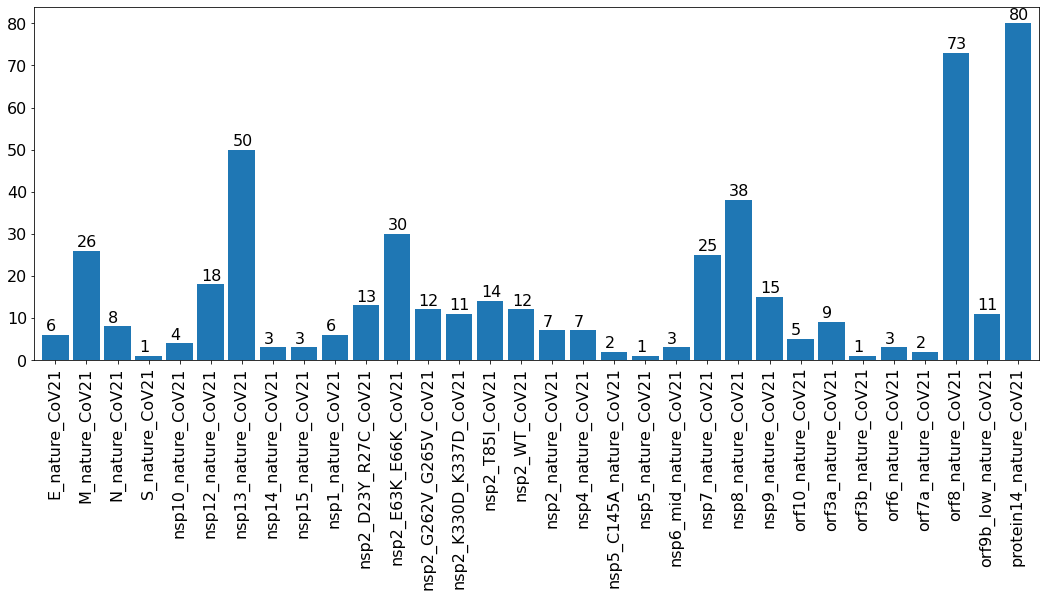

In [19]:
hc_df_neg = result[(result["MIST"]>=0.7)]
hc_df_neg = hc_df_neg[(hc_df_neg["BFDR"]<=0.05)]
hc_df_neg = hc_df_neg[(hc_df_neg["AvgSpec"]>=2)]
hc_df_neg = hc_df_neg.drop(hc_df_neg[hc_df_neg["PreyGene"].str.contains("SARS_CoV_2")].index).drop_duplicates()

hc_df_neg
ax = hc_df_neg["Bait.x"].value_counts().sort_index().plot.bar(figsize=(18,6.5), width=0.85)
for i, v in enumerate(hc_df_neg["Bait.x"].value_counts().sort_index().values):
#     print(i,v)
    ax.text(i-0.3, v + 1,  str(v), color='black')
ax.figure.savefig("Counts_bar_plot.pdf", bbox_inches="tight")

In [20]:
sig_df_neg["groupNeg"].value_counts()

nsp2_WT_CoV21    78
Name: groupNeg, dtype: int64

In [21]:
df[df["Protein"] == "P28482"]["MiST_Pos"]

Series([], Name: MiST_Pos, dtype: float64)

In [22]:
sig_df_neg = df[df["MiST_Neg"]>0.7]
sig_df_neg = sig_df_neg[sig_df_neg["BFDR_Neg"]<0.05]
sig_df_neg = sig_df_neg[sig_df_neg["AvgSpec_Neg"]>2]

sig_df_pos = df[df["MiST_Pos"]>0.7]
sig_df_pos = sig_df_pos[sig_df_pos["BFDR_Pos"]<0.05]
sig_df_pos = sig_df_pos[sig_df_pos["AvgSpec_Pos"]>2]

sig_df = pd.concat([sig_df_neg, sig_df_pos])

sig_df = sig_df.drop(sig_df[sig_df["Protein"].str.contains("SARS_CoV_2")].index).drop_duplicates()
sig_df.head(3)

Protein       groupNeg              groupPos  \
37  O14975  nsp2_WT_CoV21  nsp2_D23Y_R27C_CoV21   
58  O60573  nsp2_WT_CoV21  nsp2_D23Y_R27C_CoV21   
89  P02545  nsp2_WT_CoV21  nsp2_D23Y_R27C_CoV21   

                                 Label    log2FC        SE    Tvalue   DF  \
37  nsp2_D23Y_R27C_CoV21-nsp2_WT_CoV21  0.116995  0.133321  0.877549  4.0   
58  nsp2_D23Y_R27C_CoV21-nsp2_WT_CoV21 -0.343793  0.550575 -0.624425  4.0   
89  nsp2_D23Y_R27C_CoV21-nsp2_WT_CoV21  0.200182  0.226753  0.882820  4.0   

      pvalue  adj.pvalue  ... AvgSpec_Neg  AvgSpec_Pos  Spec_Neg  Spec_Pos  \
37  0.429736    0.938359  ...        4.33         3.67     4|6|3     6|3|2   
58  0.566198    0.941511  ...        9.67         8.67   10|11|8    13|7|6   
89  0.427197    0.938359  ...       12.00        12.33   9|13|14  11|12|14   

                       ctrlCounts_Neg                     ctrlCounts_Pos  \
37  0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0  0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0   
58  0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0  0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0   
89  2|1|1|1|1|1|0|0|1|1|0|0|0|0|1|0|0  2|1|1|1|1|1|0|0|1|1|0|0|0|0|1|0|0   

    FoldChange_Neg FoldChange_Pos Viral_Protein GeneName  
37           43.33          36.67          nsp2  SLC27A2  
58           96.67          86.67          nsp2   EIF4E2  
89           20.40          20.97          nsp2     LMNA  

[3 rows x 36 columns]

In [ ]:
sig_df.to_csv(batch + "_DifferentialInteractions.csv")

In [ ]:
df[df["GeneName"] == "VPS11"]

In [ ]:
result[result["Prey.x"] == "Q9H270"]

In [ ]:
df.columns

In [ ]:
msstats.columns

In [ ]:
hc_df_neg